In this tutorial, we learn how to obtain pairwise distance matrix using `protstruc`.

In [1]:
import protstruc as ps
import matplotlib.pyplot as plt

from protstruc.general import ATOM, AA
from biopandas.pdb import PandasPdb

/data/project/dohoon/miniconda3/envs/torch12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initialize a `StructureBatch` instance from a PDB IDs.

In [2]:
pdb_ids = ['1REX', '4EOT']
sb = ps.StructureBatch.from_pdb_id(pdb_ids)
distmat, distmat_mask = sb.pairwise_distance_matrix()

distmat.shape

torch.Size([2, 184, 184, 15, 15])

Compute total number of residues for each protein.

In [3]:
total_lengths = sb.get_total_lengths()
total_lengths

tensor([130, 184])

## Pairwise distance matrix between Ca atoms

Note that 4EOT has 2 chains, so the pairwise distance matrix shows horizontal and vertical split.

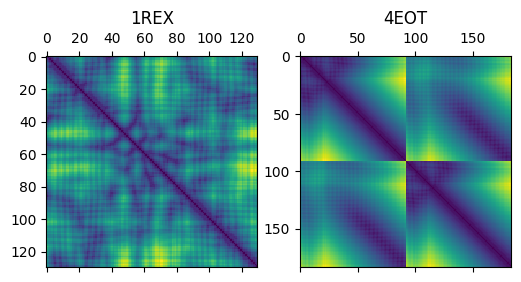

In [4]:
fig = plt.figure(figsize=(6, 3))

for i in range(2):
    pdist, mask = distmat[i, :, :, ATOM.CA, ATOM.CA], distmat_mask[i, :, :, ATOM.CA, ATOM.CA]
    total_length = total_lengths[i]

    ax = fig.add_subplot(1, 2, i+1)
    ax.matshow(pdist[:total_length, :total_length])
    ax.set_title(pdb_ids[i])

## Pairwise distance matrix between Cb atoms

Note that glycine residue does not have $C_{\beta}$ atom and thus the distance from/to glycine residue is not defined.

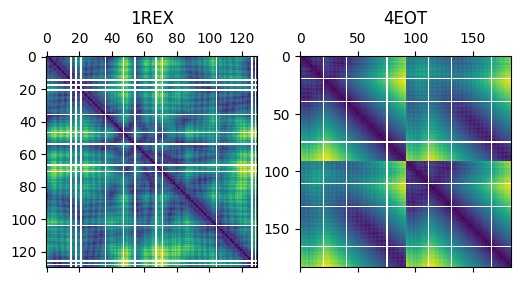

In [5]:
fig = plt.figure(figsize=(6, 3))

for i in range(2):
    pdist, mask = distmat[i, :, :, ATOM.CB, ATOM.CB], distmat_mask[i, :, :, ATOM.CB, ATOM.CB]
    total_length = total_lengths[i]

    ax = fig.add_subplot(1, 2, i+1)
    ax.matshow(pdist[:total_length, :total_length])

    ax.set_title(pdb_ids[i])